In [173]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import cross_val_score
from sklearn import linear_model 
!pip install imbalanced-learn
!pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [83]:
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore') # to supress warnings
import matplotlib.transforms as mtransforms
import matplotlib.lines as mlines
#Import libraries:
#from sklearn.preprocessing import Imputer
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import random
random.seed(2)
from sklearn.preprocessing import LabelEncoder

# Importing the dataset

In [84]:
df=pd.read_csv("finnssf_usage2.csv")
print(df)

       gender  cluster_type  agegroup  marital  education  savings_usage  \
0           2             1         6        3          4              1   
1           2             1         4        4          4              1   
2           1             1         6        2          2              1   
3           1             1         2        1          2              1   
4           1             2         2        4          3              1   
...       ...           ...       ...      ...        ...            ...   
22019       1             1         4        4          3              1   
22020       1             1         4        4          4              1   
22021       2             2         3        4          3              1   
22022       1             1         3        1          3              1   
22023       1             2         4        4          3              1   

       loan_usage  defaulted  bank_usage  nhif_usage  nssf_usage  vul_index  \
0       

In [86]:
#
df=pd.read_csv("finnssf_usage2.csv")
df.head()

,gender,cluster_type,agegroup,marital,education,savings_usage,loan_usage,defaulted,bank_usage,nhif_usage,nssf_usage,vul_index,incomegp,finhealthscore
0,2,1,6,3,4,1,1,0,1,1,2,2,5,4
1,2,1,4,4,4,1,1,0,2,1,2,3,4,6
2,1,1,6,2,2,1,3,0,3,1,2,2,2,1
3,1,1,2,1,2,1,2,0,3,2,2,1,3,3
4,1,2,2,4,3,1,1,1,1,2,2,3,4,7


In [140]:
df.shape

(22024, 14)

NSSF_USAGE 1:Currently have
           2:Never had
           
NHIF_USAGE 1:Currently have
           2:Used to have
           3:Never had
         
AGE_55     0:55 and below years
           1: above 55
           
AGE_70     0:70 and below years
           1:above 70 years

RDUCATION  1: None
           2:Primary
           3:Secondary
           4: Tertiary
           5:Other

WEALTH QUANT  1:Lowest
              2:Second lowest
              3:Middle
              4:Second highest
              5:Highest
              
GENDER        1:Male
              2:Female
              
SAVINGS FORMAL 1:Currently have
               2:Used to have
               3:Never had
              
              
              

           
           
          
        

In [87]:
df.isnull().sum()

gender            0
cluster_type      0
agegroup          0
marital           0
education         0
savings_usage     0
loan_usage        0
defaulted         0
bank_usage        0
nhif_usage        0
nssf_usage        0
vul_index         0
incomegp          0
finhealthscore    0
dtype: int64

In [88]:
df

,gender,cluster_type,agegroup,marital,education,savings_usage,loan_usage,defaulted,bank_usage,nhif_usage,nssf_usage,vul_index,incomegp,finhealthscore
0,2,1,6,3,4,1,1,0,1,1,2,2,5,4
1,2,1,4,4,4,1,1,0,2,1,2,3,4,6
2,1,1,6,2,2,1,3,0,3,1,2,2,2,1
3,1,1,2,1,2,1,2,0,3,2,2,1,3,3
4,1,2,2,4,3,1,1,1,1,2,2,3,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22019,1,1,4,4,3,1,1,0,2,1,2,3,7,5
22020,1,1,4,4,4,1,1,0,1,1,1,3,5,8
22021,2,2,3,4,3,1,1,0,1,2,2,3,7,4
22022,1,1,3,1,3,1,2,0,2,1,2,3,7,9


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22024 entries, 0 to 22023
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          22024 non-null  int64
 1   cluster_type    22024 non-null  int64
 2   agegroup        22024 non-null  int64
 3   marital         22024 non-null  int64
 4   education       22024 non-null  int64
 5   savings_usage   22024 non-null  int64
 6   loan_usage      22024 non-null  int64
 7   defaulted       22024 non-null  int64
 8   bank_usage      22024 non-null  int64
 9   nhif_usage      22024 non-null  int64
 10  nssf_usage      22024 non-null  int64
 11  vul_index       22024 non-null  int64
 12  incomegp        22024 non-null  int64
 13  finhealthscore  22024 non-null  int64
dtypes: int64(14)
memory usage: 2.4 MB


In [89]:
df.shape

(22024, 14)

In [141]:
X_train.shape

(17619, 13)

In [142]:
X_test.shape

(4405, 13)

In [143]:
y_train.shape

(17619,)

In [147]:
y_train_resampled.shape

(32514,)

In [91]:
df.describe

<bound method NDFrame.describe of        gender  cluster_type  agegroup  marital  education  savings_usage  \
0           2             1         6        3          4              1   
1           2             1         4        4          4              1   
2           1             1         6        2          2              1   
3           1             1         2        1          2              1   
4           1             2         2        4          3              1   
...       ...           ...       ...      ...        ...            ...   
22019       1             1         4        4          3              1   
22020       1             1         4        4          4              1   
22021       2             2         3        4          3              1   
22022       1             1         3        1          3              1   
22023       1             2         4        4          3              1   

       loan_usage  defaulted  bank_usage  nhif_usage 

In [92]:
df.dtypes

gender            int64
cluster_type      int64
agegroup          int64
marital           int64
education         int64
savings_usage     int64
loan_usage        int64
defaulted         int64
bank_usage        int64
nhif_usage        int64
nssf_usage        int64
vul_index         int64
incomegp          int64
finhealthscore    int64
dtype: object

# Explaratory Data Analysis


In [93]:
cor= df.corr()
cor

,gender,cluster_type,agegroup,marital,education,savings_usage,loan_usage,defaulted,bank_usage,nhif_usage,nssf_usage,vul_index,incomegp,finhealthscore
gender,1.000000,-0.002217,0.011770,0.038927,-0.110703,-0.000593,-0.000260,0.015661,0.107365,0.077548,0.108751,-0.017649,-0.063349,-0.058557
cluster_type,-0.002217,1.000000,-0.148320,-0.108585,0.258528,-0.048128,-0.061224,0.006486,-0.215075,-0.145664,-0.145076,0.093850,0.117487,0.103939
agegroup,0.011770,-0.148320,1.000000,0.402760,-0.292999,-0.112471,-0.122464,0.023587,-0.037169,-0.119664,-0.029073,-0.055546,0.017411,-0.023081
marital,0.038927,-0.108585,0.402760,1.000000,-0.196900,-0.139329,-0.198272,0.123775,-0.082613,-0.092792,-0.052096,-0.044917,0.002400,0.082792
education,-0.110703,0.258528,-0.292999,-0.196900,1.000000,-0.168534,-0.144509,-0.006968,-0.395077,-0.298333,-0.280897,0.280394,0.087458,0.306909
savings_usage,-0.000593,-0.048128,-0.112471,-0.139329,-0.168534,1.000000,0.382115,-0.181374,0.335003,0.161431,0.126511,-0.158404,0.008575,-0.334959
loan_usage,-0.000260,-0.061224,-0.122464,-0.198272,-0.144509,0.382115,1.000000,-0.549535,0.523229,0.188630,0.185587,-0.031017,0.030839,-0.215763
defaulted,0.015661,0.006486,0.023587,0.123775,-0.006968,-0.181374,-0.549535,1.000000,-0.216792,0.005612,-0.015091,-0.117807,-0.067678,-0.013651
bank_usage,0.107365,-0.215075,-0.037169,-0.082613,-0.395077,0.335003,0.523229,-0.216792,1.000000,0.335586,0.305420,-0.191206,-0.063255,-0.352465
nhif_usage,0.077548,-0.145664,-0.119664,-0.092792,-0.298333,0.161431,0.188630,0.005612,0.335586,1.000000,0.515516,-0.198922,-0.099042,-0.300076


In [94]:
# Assuming 'cor' is the correlation matrix
correlation_threshold = 0.7  # Set your desired correlation threshold

# Find the pairs of features with correlation above the threshold
high_correlation_pairs = []

for i in range(len(cor.columns)):
    for j in range(i + 1, len(cor.columns)):
        if abs(cor.iloc[i, j]) > correlation_threshold:
            feature_pair = (cor.columns[i], cor.columns[j], cor.iloc[i, j])
            high_correlation_pairs.append(feature_pair)

# Display the features with the highest correlation
if high_correlation_pairs:
    print("Features with Highest Correlation:")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]}")
else:
    print("No features have correlation above the threshold.")


No features have correlation above the threshold.


<Axes: >

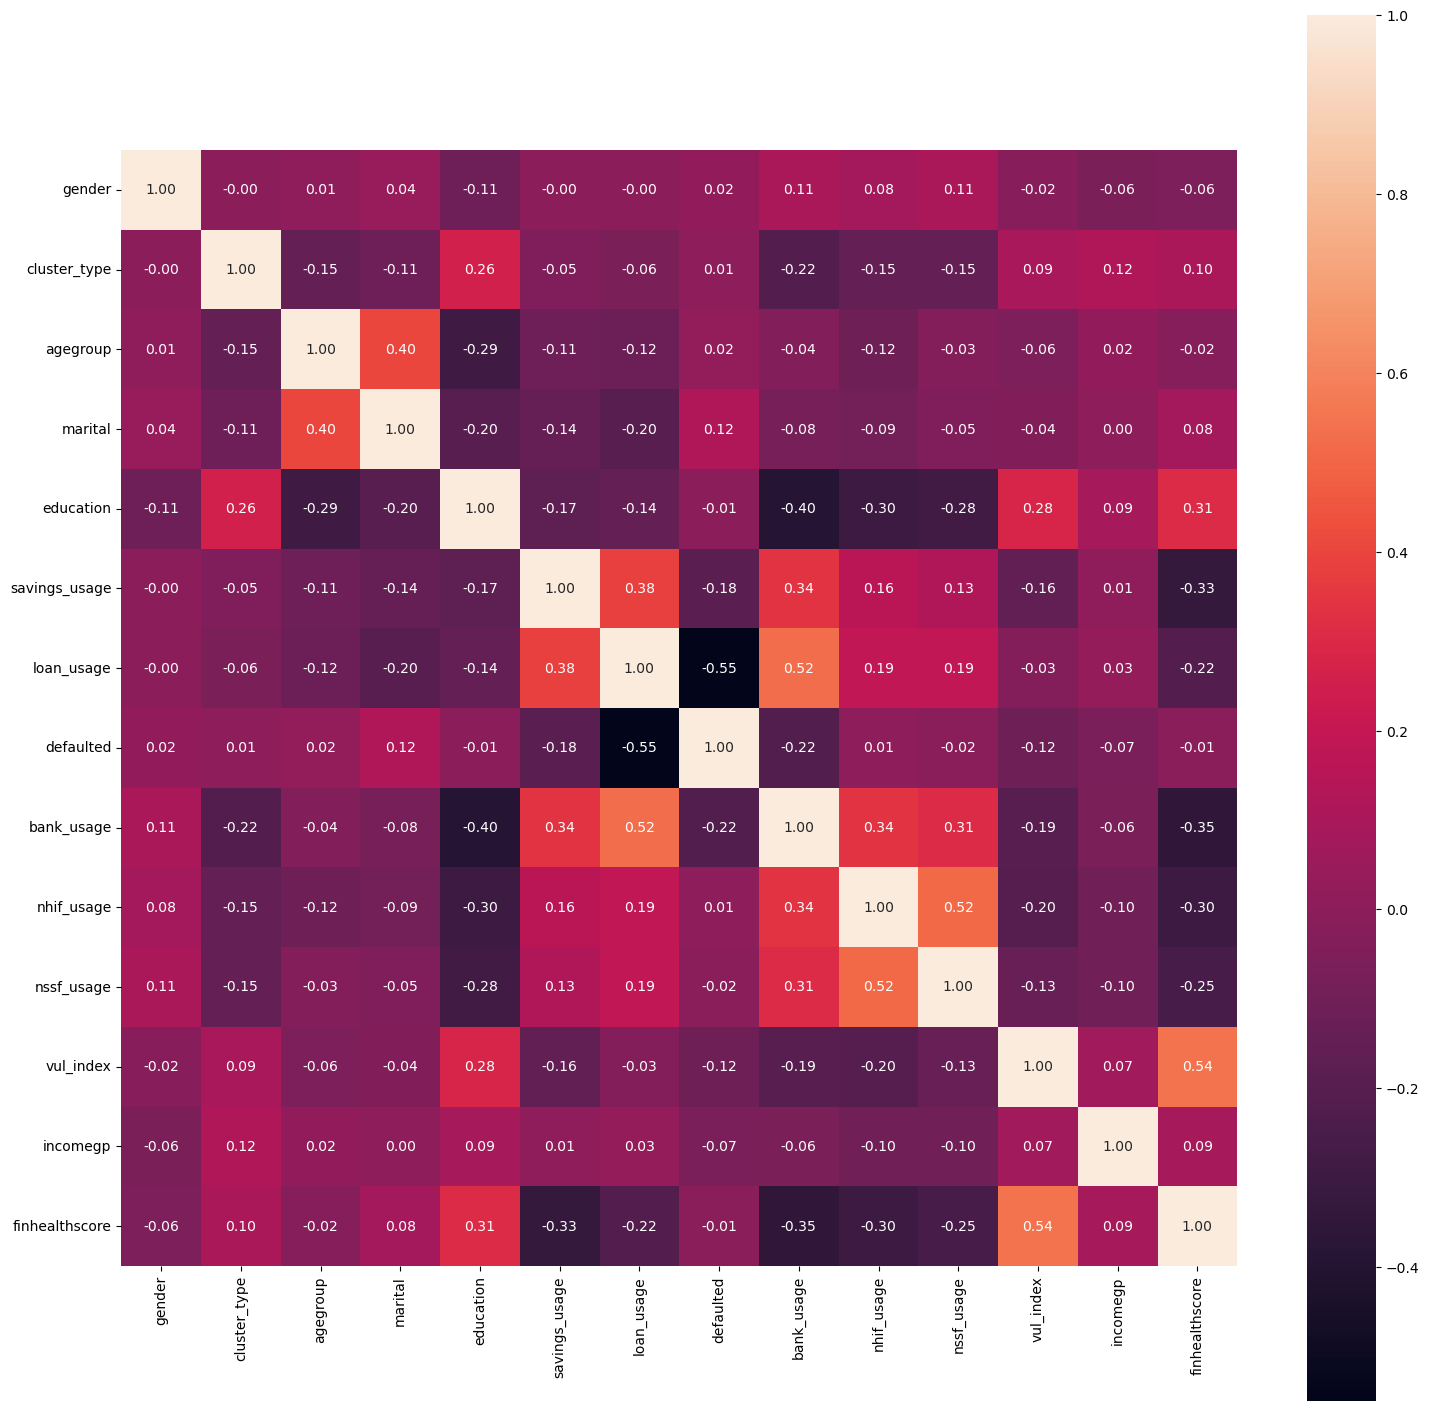

In [95]:
plt.figure(figsize=(18,18))
sns.heatmap(cor, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            xticklabels=cor.columns.values,
            yticklabels=cor.columns.values)

In [96]:
# Assuming df is your DataFrame
nssf_usage_counts = df['nssf_usage'].value_counts()

# Print the value counts
print("Value Counts for 'nssf_usage':")
print(nssf_usage_counts)


Value Counts for 'nssf_usage':
2    20298
1     1726
Name: nssf_usage, dtype: int64


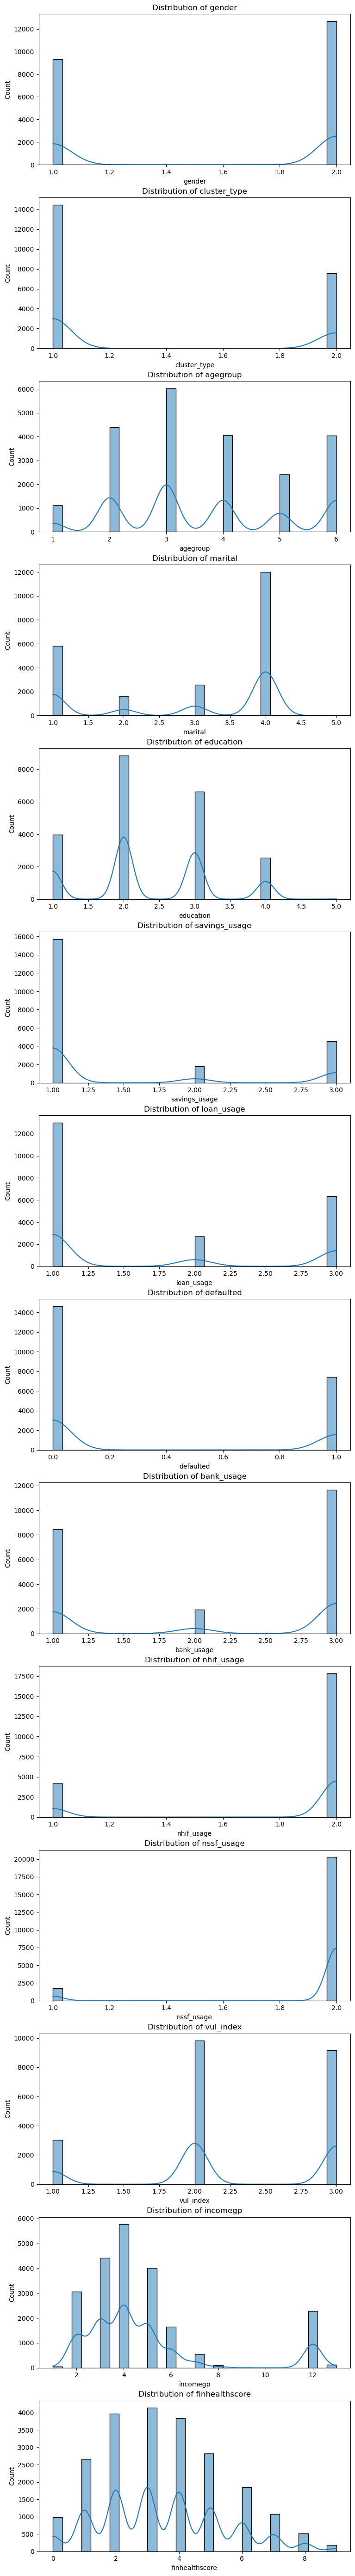

In [97]:
features_to_visualize = ['gender','cluster_type','agegroup','marital','education','savings_usage','loan_usage','defaulted','bank_usage','nhif_usage','nssf_usage','vul_index','incomegp','finhealthscore']
# Set up subplots
fig, axes = plt.subplots(nrows=len(features_to_visualize), ncols=1, figsize=(8, 4 * len(features_to_visualize)))
fig.tight_layout(pad=3.0)

# Plot distribution for each feature
for i, feature in enumerate(features_to_visualize):
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax, bins=30)
    ax.set_title(f'Distribution of {feature}')

plt.show()

NSSF USAGE DISTRIBUTION(TARGET VARIABLE)

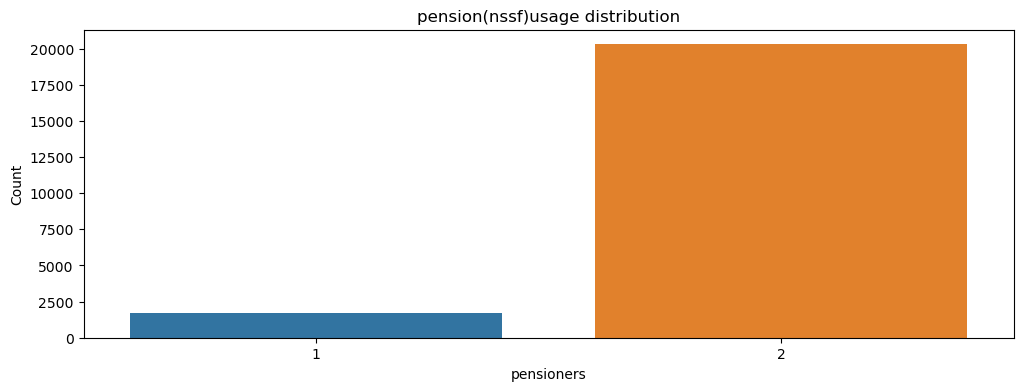

In [98]:
# Plot the nssf usage on this population
sns.countplot(x='nssf_usage', data=df)

# Set the title and labels
plt.title('pension(nssf)usage distribution')
plt.xlabel('pensioners')
plt.ylabel('Count')

# Show the plot
plt.show()

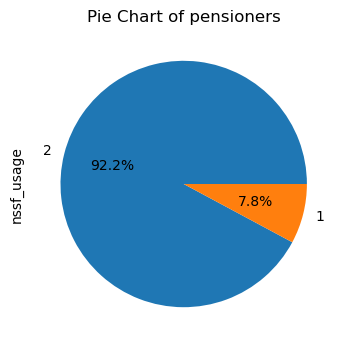

In [99]:
#pie chart representing nssf usage
df['nssf_usage'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of pensioners')
plt.show()

FINANCIAL HEALTH DISTRIBUTION

In [100]:
print(df['finhealthscore'].value_counts())
print(df['nssf_usage'].value_counts())


3    4142
2    3967
4    3831
5    2817
1    2666
6    1853
7    1073
0     980
8     511
9     184
Name: finhealthscore, dtype: int64
2    20298
1     1726
Name: nssf_usage, dtype: int64


Text(0.5, 0, 'finhealth')

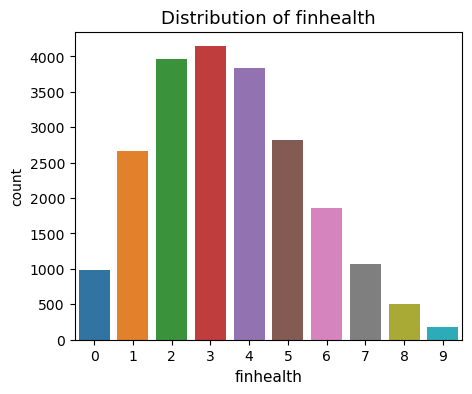

In [101]:
#Using Barplot for this distribution

fig,ax=plt.subplots(figsize=(5,4))
term_order = df['finhealthscore'].value_counts().index
sns.countplot(x='finhealthscore', data = df)
plt.title('Distribution of finhealth',fontsize=13);
plt.xlabel('finhealth', fontsize=11)

GENDER DISTRIBUTION

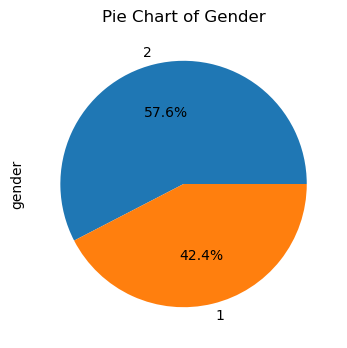

In [102]:
df['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of Gender')
plt.show()


INCOME DISTRIBUTION

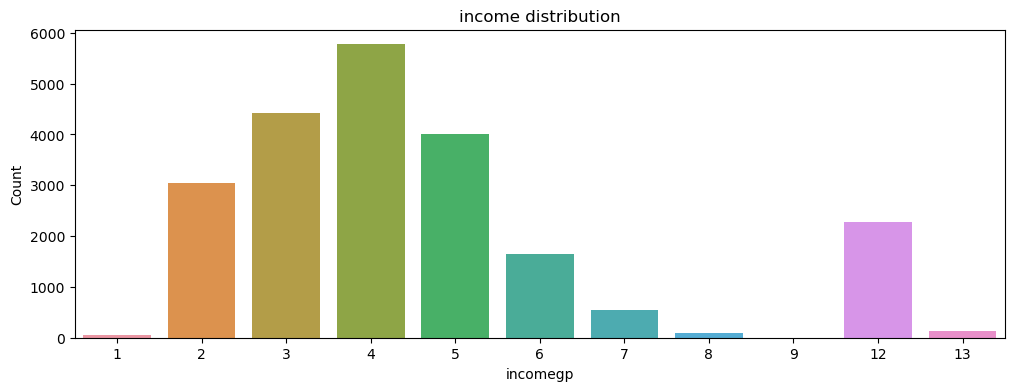

In [103]:
sns.countplot(x='incomegp', data=df)

# Set the title and labels
plt.title('income distribution')
plt.xlabel('incomegp')
plt.ylabel('Count')

# Show the plot
plt.show()

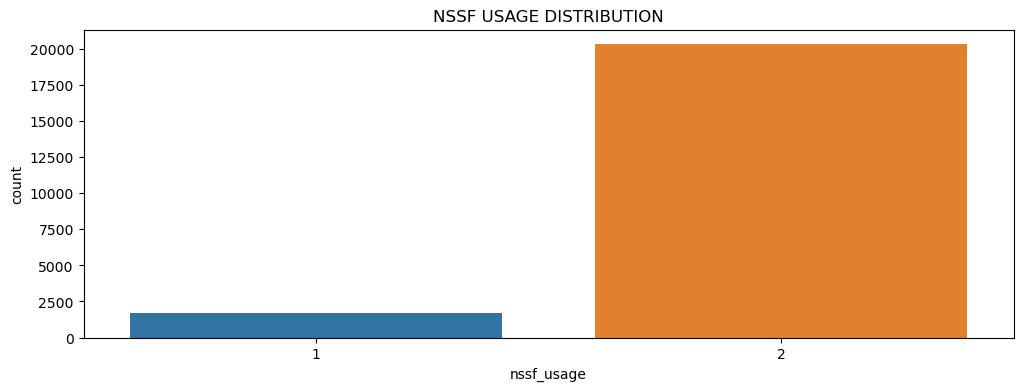

In [104]:
sns.countplot(x='nssf_usage', data=df)
plt.title('NSSF USAGE DISTRIBUTION')
plt.show()


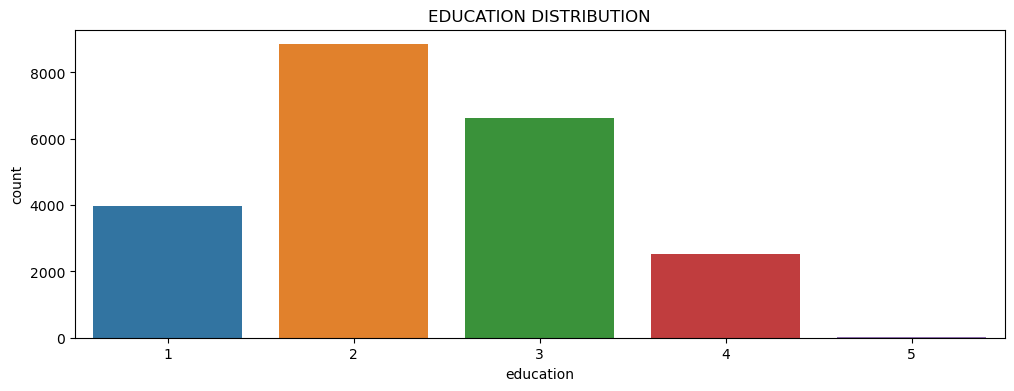

In [105]:
sns.countplot(x='education', data=df)
plt.title('EDUCATION DISTRIBUTION')
plt.show()

BIVARIATE DISTRIBUTION

NSSF USAGE VS GENDER

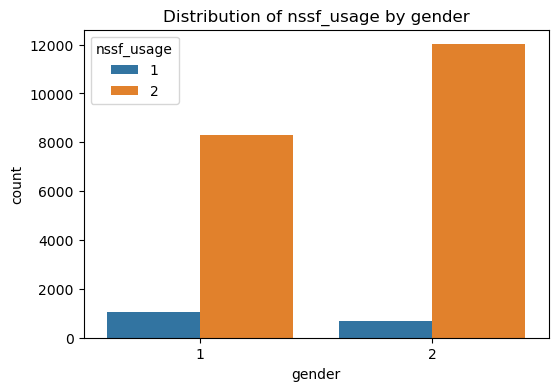

In [106]:

binary_categorical_vars = ['gender']

for var in binary_categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, hue='nssf_usage', data=df)
    plt.title(f'Distribution of nssf_usage by {var}')
    plt.show()


In [107]:
print(df['gender'].value_counts())
print(df['nssf_usage'].value_counts())



2    12685
1     9339
Name: gender, dtype: int64
2    20298
1     1726
Name: nssf_usage, dtype: int64


NSSF USAGE VS NHIF USAGE

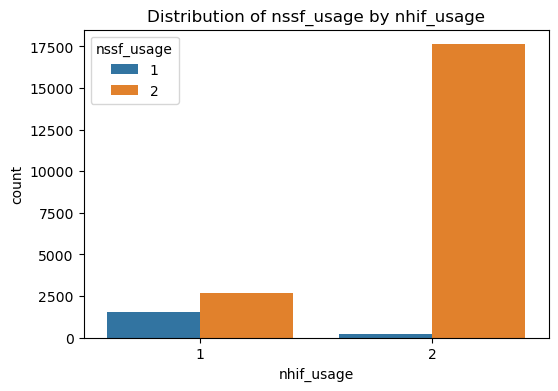

In [108]:

binary_categorical_vars = ['nhif_usage']

for var in binary_categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, hue='nssf_usage', data=df)
    plt.title(f'Distribution of nssf_usage by {var}')
    plt.show()

AGE GROUPS VS NSSF

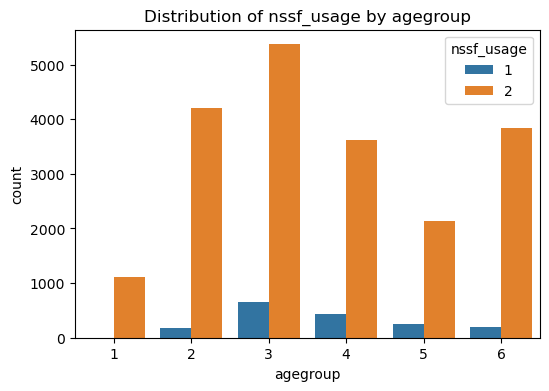

In [109]:
binary_categorical_vars = ['agegroup']

for var in binary_categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, hue='nssf_usage', data=df)
    plt.title(f'Distribution of nssf_usage by {var}')
    plt.show()

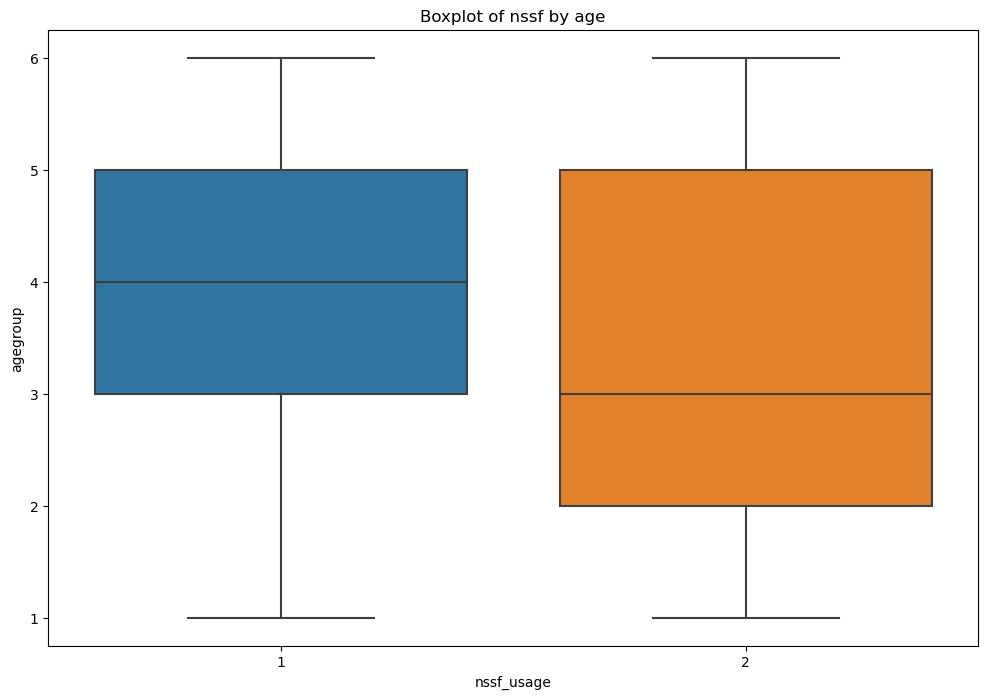

In [110]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='nssf_usage', y='agegroup', data=df)
plt.title('Boxplot of nssf by age')
plt.show()

EDUCATION VS NSSF 

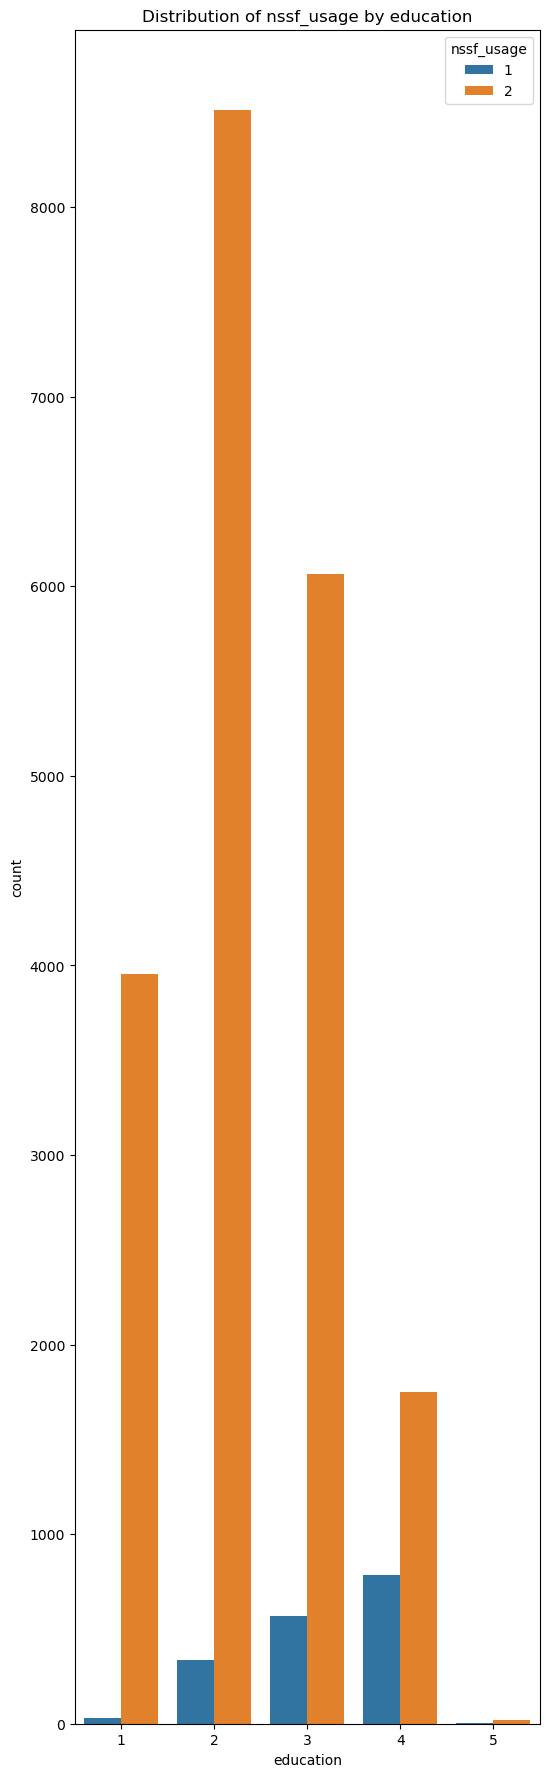

In [111]:
binary_categorical_vars = ['education']

for var in binary_categorical_vars:
    plt.figure(figsize=(6, 22))
    sns.countplot(x=var, hue='nssf_usage', data=df)
    plt.title(f'Distribution of nssf_usage by {var}')
    plt.show()

INCOME VS NSSF 

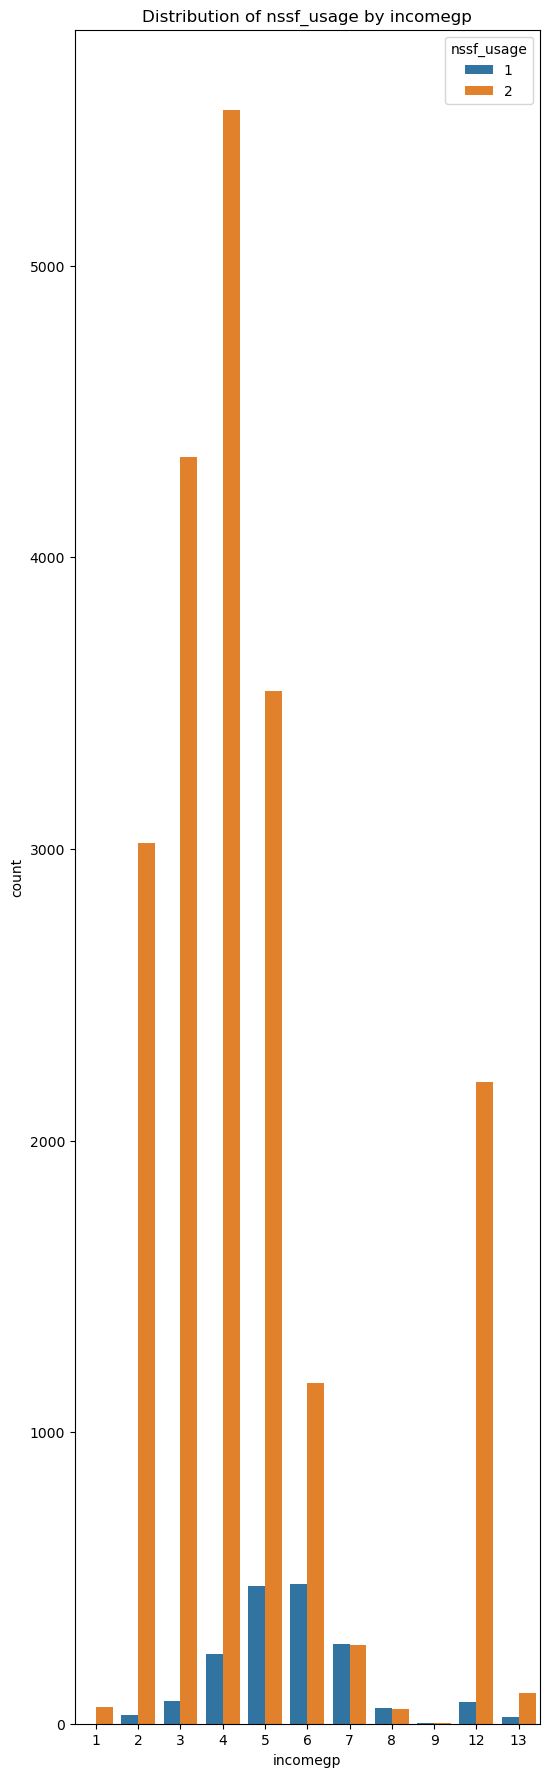

In [112]:
binary_categorical_vars = ['incomegp']

for var in binary_categorical_vars:
    plt.figure(figsize=(6, 22))
    sns.countplot(x=var, hue='nssf_usage', data=df)
    plt.title(f'Distribution of nssf_usage by {var}')
    plt.show()

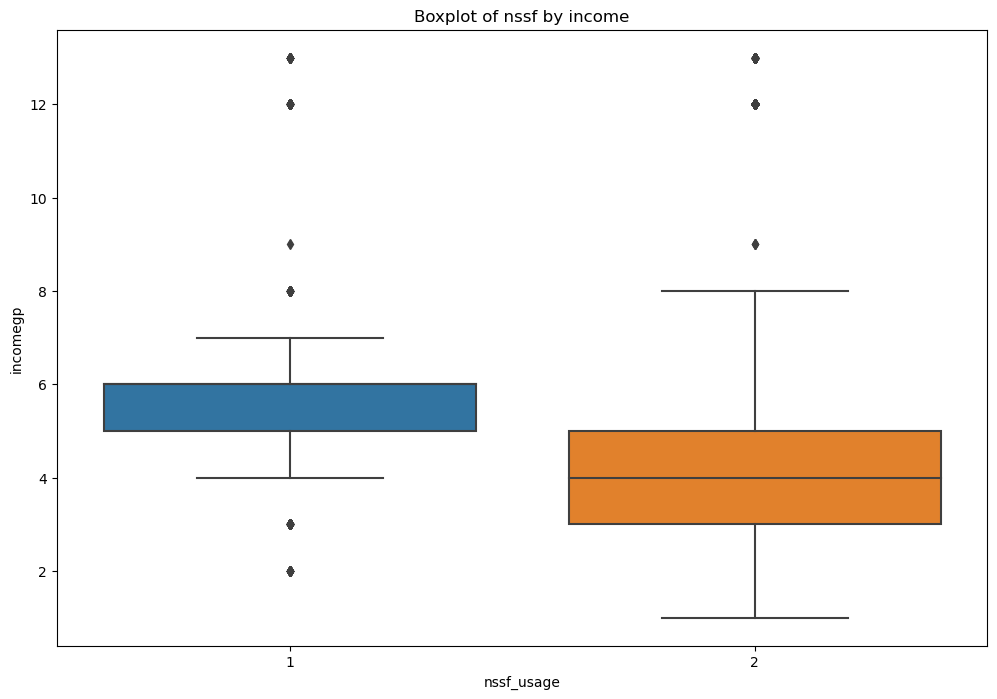

In [113]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='nssf_usage', y='incomegp', data=df)
plt.title('Boxplot of nssf by income')
plt.show()

In [114]:
print(df['incomegp'].value_counts())

4     5771
3     4422
5     4015
2     3053
12    2274
6     1647
7      546
13     131
8      102
1       59
9        4
Name: incomegp, dtype: int64


VULNERABILITY VS NSSF


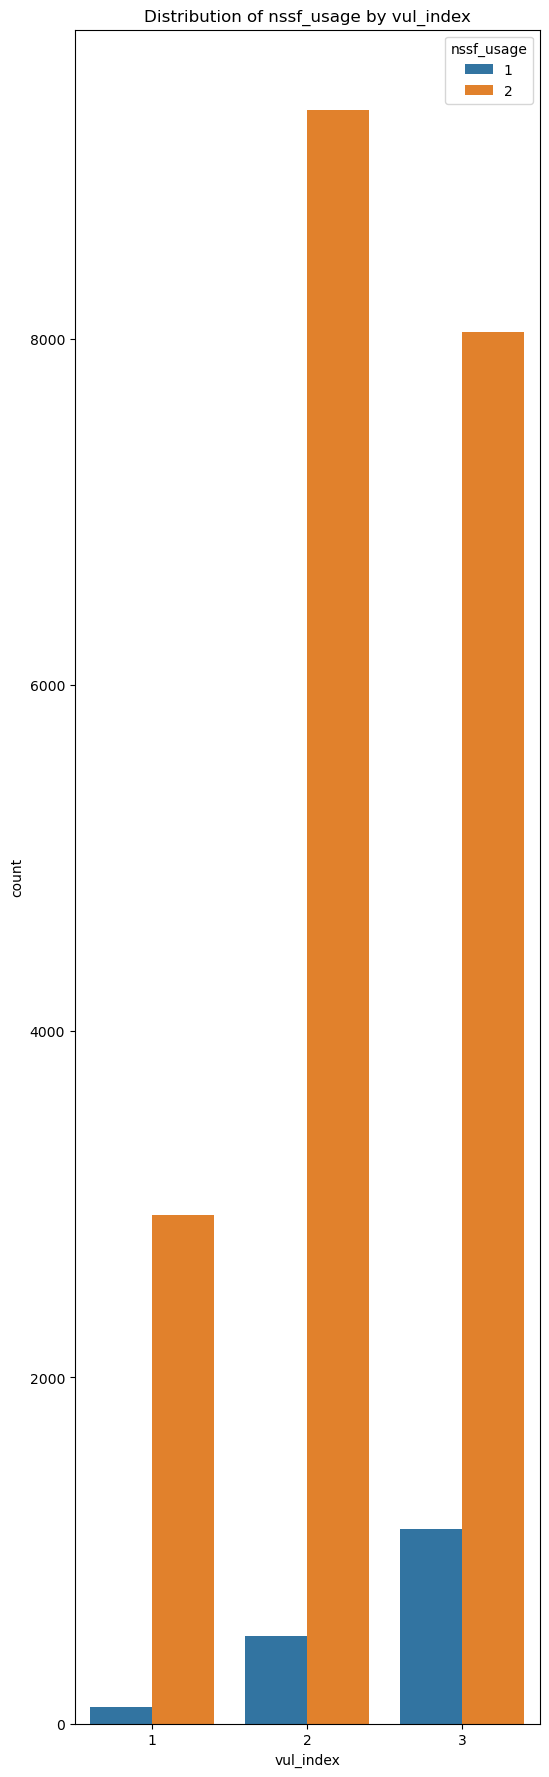

In [115]:
binary_categorical_vars = ['vul_index']

for var in binary_categorical_vars:
    plt.figure(figsize=(6, 22))
    sns.countplot(x=var, hue='nssf_usage', data=df)
    plt.title(f'Distribution of nssf_usage by {var}')
    plt.show()

Age vs NSSF usage

# #FEATURE ENGINEERING


#REMOVING OUTLIERS

In [116]:
# checking for outliers
def check_outliers(df):
    for i in df.columns:
        if df[i].dtype != 'object':
            sns.boxplot(df[i])
            plt.title(i)
            plt.show()

In [117]:
df= replace_outliers(df)
check_outliers(df)

NameError: name 'replace_outliers' is not defined

In [118]:
# replace the outliers with the upper and lower bound values of a boxplot
def replace_outliers(df):
    for i in df.columns:
        if df[i].dtype !='object':
            q1 = df[i].quantile(0.25)
            q3 = df[i].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])
            df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])
    return df

# DATA BALANCING

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import TomekLinks




 
X = df.drop('nssf_usage', axis=1)
y = df['nssf_usage']


In [122]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [149]:
y_train_resampled.shape

(17619,)

In [121]:
X_train.dtypes

gender            int64
cluster_type      int64
agegroup          int64
marital           int64
education         int64
savings_usage     int64
loan_usage        int64
defaulted         int64
bank_usage        int64
nhif_usage        int64
vul_index         int64
incomegp          int64
finhealthscore    int64
dtype: object

In [148]:
X_train, X_test, y_train_resampled, y_test_resampled = train_test_split(X, y, test_size=0.2, random_state=42)



In [124]:
print("Train Dataset Statistics:")
print(X_train.describe())

print("\nTest Dataset Statistics:")
print(X_test.describe())


Train Dataset Statistics:
             gender  cluster_type      agegroup       marital     education  \
count  17619.000000  17619.000000  17619.000000  17619.000000  17619.000000   
mean       1.576764      1.341166      3.648959      2.944889      2.353482   
std        0.494086      0.474114      1.497791      1.293721      0.909846   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      1.000000      2.500000      1.000000      2.000000   
50%        2.000000      1.000000      3.000000      4.000000      2.000000   
75%        2.000000      2.000000      5.000000      4.000000      3.000000   
max        2.000000      2.000000      6.000000      5.000000      5.000000   

       savings_usage    loan_usage     defaulted    bank_usage    nhif_usage  \
count   17619.000000  17619.000000  17619.000000  17619.000000  17619.000000   
mean        1.489358      1.697996      0.335320      2.144276      1.809978   
std         0.810616  

In [125]:
# Assuming df is your DataFrame
nssf_usage_counts = df['nssf_usage'].value_counts()

# Print the value counts
print("Value Counts for 'nssf_usage':")
print(nssf_usage_counts)


Value Counts for 'nssf_usage':
2    20298
1     1726
Name: nssf_usage, dtype: int64


In [126]:
print("Train Dataset Statistics:")
print(y_train.describe())

print("\nTest Dataset Statistics:")
print(y_test.describe())

Train Dataset Statistics:
count    17619.000000
mean         1.922697
std          0.267079
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: nssf_usage, dtype: float64

Test Dataset Statistics:
count    4405.000000
mean        1.917367
std         0.275359
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: nssf_usage, dtype: float64


In [127]:
df['nssf_usage'] = df['nssf_usage'].astype(str)
# If necessary, convert the data type to integer
y_train = y_train.astype(int)



In [ ]:
import numpy as np

unique_classes = np.unique(y_train)
print("Unique Classes in y_train:", unique_classes)


In [129]:
y_train.dtypes


dtype('int32')

In [131]:
y_train.value_counts()


2    16257
1     1362
Name: nssf_usage, dtype: int64

In [132]:
# Use RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Use RandomOverSampler to balance the classes
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

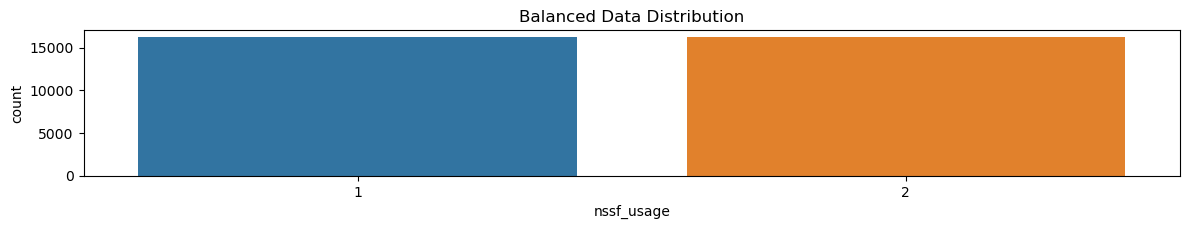

In [133]:
plt.subplot(2, 1, 2)
sns.countplot(x=y_train_resampled)
plt.title('Balanced Data Distribution')

plt.tight_layout()
plt.show()

#DATA MODELLING

In [158]:
# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Adjust threshold
custom_threshold = 0


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train_resampled)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
#accuracy = accuracy_score(y_test_resampled, y_pred)
#classification_report_result = classification_report(y_test, y_pred)

#print(f'Accuracy: {accuracy}')
#print(f'Classification Report:\n{classification_report_result}')


In [157]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming X_test and y_test are your test set features and target variable
# If you already have y_pred_proba, you can use it directly in the evaluation metrics

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.4f}')

# Precision Score
precision = precision_score(y_test, y_pred)
print(f'Precision Score: {precision:.4f}')

# AUC Score
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'AUC Score: {auc_score:.4f}')






Accuracy Score: 0.9369
Precision Score: 0.6581
AUC Score: 0.9460


In [162]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score




# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
random_forest_classifier.fit(X_train, y_train_resampled)

# Make predictions on the test data
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Evaluate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Calculate the AUC score
y_probabilities = random_forest_classifier.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probabilities)
print(f"AUC Score: {auc_score:.2f}")


Accuracy: 0.93
Precision: 0.58
AUC Score: 0.92


In [179]:
# Assuming y_test_resampled and y_pred_resampled are your original labels
y_train_resampled = [1, 2, 1, 2, 1, 2]  # Replace with your actual labels
y_test_resampled = [1, 2, 1, 2, 1, 2]  # Replace with your actual labels
y_pred_resampled = [2, 1, 2, 1, 2, 1]  # Replace with your actual labels

# Define a mapping from old classes to new classes
class_mapping = {1: 0, 2: 1}

# Map the old class labels to the new class labels
y_train_resampled_mapped = [class_mapping[label] for label in y_train_resampled]
y_test_resampled_mapped = [class_mapping[label] for label in y_test_resampled]
y_pred_resampled_mapped = [class_mapping[label] for label in y_pred_resampled]

# Now, the classes are mapped from [1, 2] to [0, 1]
print("y_train_resampled_mapped:", y_train_resampled_mapped)
print("y_test_resampled_mapped:", y_test_resampled_mapped)
print("y_pred_resampled_mapped:", y_pred_resampled_mapped)


y_train_resampled_mapped: [0, 1, 0, 1, 0, 1]
y_test_resampled_mapped: [0, 1, 0, 1, 0, 1]
y_pred_resampled_mapped: [1, 0, 1, 0, 1, 0]


In [183]:
!pip install xgboost

from sklearn.metrics import accuracy_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train_resampled_mapped)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)


XGBoostError: [10:42:31] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\data\data.cc:501: Check failed: this->labels.Size() % this->num_row_ == 0 (6 vs. 0) : Incorrect size for labels.

In [163]:
# Predictions
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(result_df)

       Actual  Predicted
16601       2          2
15290       2          2
13824       2          2
18943       2          2
16966       2          2
...       ...        ...
8545        2          2
8149        2          2
1157        2          2
12579       2          2
14524       2          2

[4405 rows x 2 columns]
